In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as stats
import pandas as pd

np.set_printoptions(edgeitems=5)

# A Data Riddle

The Riddler is a weekly column at [fivethirtyeight](https://fivethirtyeight.com/), where they offer puzzles on maths, logic and probability. These puzzles are often solved using data analysis approaches. 

The following puzzle could originally be found [here](https://fivethirtyeight.com/features/are-you-the-best-warlord/). The puzzle received submissions from around 1500 users, and their submissions are available [here](https://github.com/fivethirtyeight/data/blob/master/riddler-castles/castle-solutions-3.csv).

___
#### Are you The Best Warlord?

In a distant, war-torn land, there are two warlords: you and your archenemy.

In this land, there are ten castles. Each castle has its own strategic value for a would-be conqueror. Specifically, the castles are worth 1, 2, 3, …, 9, and 10 victory points (corresponding to the castle number). This means there are 50 victory points in total up for grabs points in the war.

You and your enemy each have 100 soldiers to distribute, any way you like, to fight at any of the ten castles. Whoever sends more soldiers to a given castle conquers that castle and wins its victory points. If you each send the same number of troops, you split the points. 

You don’t know what distribution of forces your enemy has chosen until the battles begin. Whoever wins the most points wins the war.
___

In the exercises for today you will be working with these submitted solutions to the puzzle, which can be found in `submissions.txt`.

The file has the following variables:

| Column index | Variable | Definition |
| -:- | :- | :- | 
| 0 | Castle 1 | The number of troops deployed to the castle |
| 1 | Castle 2 | The number of troops deployed to the castle |
| 2 | Castle 3 | The number of troops deployed to the castle |
| 3 | Castle 4 | The number of troops deployed to the castle |
| 4 | Castle 5 | The number of troops deployed to the castle |
| 5 | Castle 6 | The number of troops deployed to the castle |
| 6 | Castle 7 | The number of troops deployed to the castle |
| 7 | Castle 8 | The number of troops deployed to the castle |
| 8 | Castle 9 | The number of troops deployed to the castle |
| 9 | Castle 10 | The number of troops deployed to the castle |
| 10 | Why did you choose your troop deployment? | String containing the reasoning behind the submission |


### 14.0. Load the data and convert it to a numpy array
Inspect the `submissions.txt` file and read through the provided function below to understand what each line does

Once you've done that, apply the function to the `submissions.txt` file and convert the resulting data structure into a numpy array which you will use for the rest of the exercises.

In [2]:
def read_csv(filepath):
    output = []
    regex = "^\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+,\d+"
    with open(filepath, "r", errors="replace") as file:
        lines = file.readlines()
    for line in lines:
        regex_find = re.search(regex,line)
        if regex_find:
            line = regex_find.group() 
            line = line.split(",") 
            line = [int(value) for value in line]
            output.append(line)
    return output

In [3]:
data = np.array(read_csv("submissions.txt"))
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9
0,2,2,2,2,6,18,2,28,36,2
1,1,1,1,11,19,27,37,1,1,1
2,2,3,4,5,6,22,6,22,22,8
3,2,2,4,6,6,10,11,14,17,28
4,1,1,2,3,16,22,1,1,33,20
...,...,...,...,...,...,...,...,...,...,...
1456,2,3,5,4,8,8,12,16,5,32
1457,1,3,4,8,10,12,13,15,17,18
1458,0,1,2,16,21,2,3,1,32,22
1459,0,0,3,3,16,6,16,21,4,31


### 14.1. Clean the data

We know that there are supposed to be 100 deployed troops in total per submission. This is not the case for all of the submissions, however, so we need to clean the data.

Extract the rows where the sum over all the castles of the row is 100 and store your cleaned data in a new numpy array. 
___

Clean data array shape: `(1321,10)`

In [4]:
data.shape

(1461, 10)

In [5]:
mask = data.sum(axis=1)==100 #Create mask that has true where the sum of the row is equal to 100 ans False otherwise
mask

array([ True,  True,  True,  True,  True, ..., False, False,  True,  True,
        True])

In [6]:
mask.shape

(1461,)

In [7]:
np.sum(mask) #Count number of True in mask

1321

In [8]:
new_data = data[mask] #Apply mask
new_data.shape

(1321, 10)

### 14.Extra. Plot soldier distribution for each castle

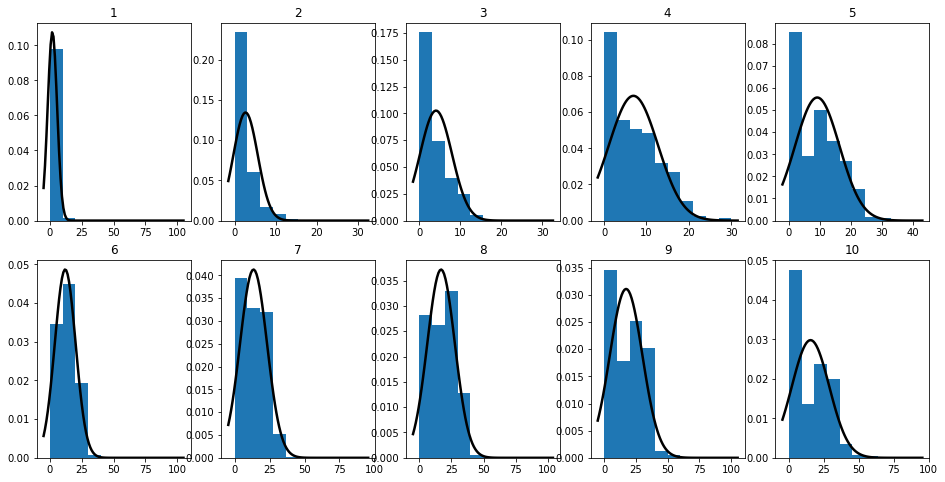

In [9]:
n_rows = 2
n_cols = 5
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8))

for row in range(n_rows):
    for col in range(n_cols):
        castle = 1+row*n_cols+col #Formula for getting castle number from row and col
        ax[row,col].hist(new_data[:,castle-1], density=True)
        ax[row,col].set_title(castle)
        
        
        ###Straight up stolen from lecture 13
        mu, sigma = stats.norm.fit(new_data[:,castle-1])

        xmin, xmax = ax[row,col].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        y = stats.norm.pdf(x, mu, sigma)
        ax[row,col].plot(x, y, 'k', linewidth=2.5);
        ###
